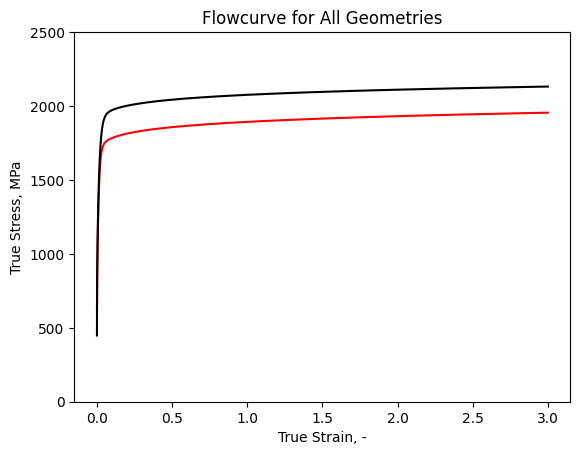

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def swiftVoceT(x, c1, c2, c3, c4, c5, c6, c7):
    return c1*c2*(x + c3) ** c4  +  (1-c1)*c5+ c6* (1 - np.exp(-c7 * x))

truePlasticStrain = np.arange(0, 3.0005, 0.0005)
y_line_maxStress_sw_predicted = swiftVoceT(truePlasticStrain, 0.4459129273891449, 1200.0, 0.0010000000474974513, 0.10000000149011612, 645.9520874023438, 1000.0, 100.0)

y_line_maxStress_sw_ideal = swiftVoceT(truePlasticStrain, 0.5, 1300, 2.3 * 10**-14, 0.075, 773.18, 1039.37, 73.94)


plt.figure(1)
plt.plot(truePlasticStrain, y_line_maxStress_sw_predicted, color='red', label='predicted')
plt.plot(truePlasticStrain, y_line_maxStress_sw_ideal, color='black', label='ideal')


plt.title('Flowcurve for All Geometries')
#plt.xlim(left=0.0, right=3)
plt.ylim(bottom=0, top=2500)
plt.xlabel('True Strain, -')
plt.ylabel('True Stress, MPa')
ax1.legend()
plt.show()


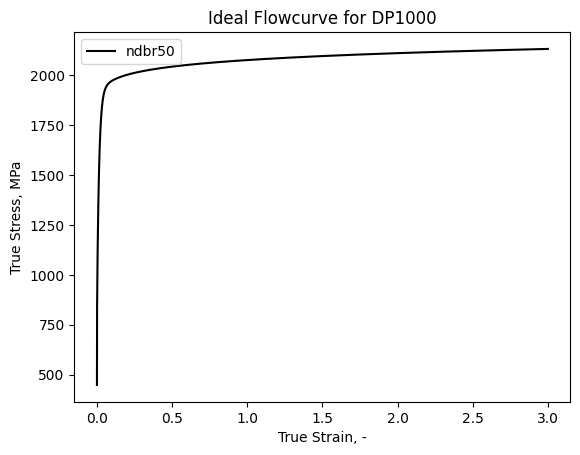

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def swiftVoceT(x, c1, c2, c3, c4, c5, c6, c7):
    return c1*c2*(x + c3) ** c4  +  (1-c1)*c5+ c6* (1 - np.exp(-c7 * x))

truePlasticStrain = np.arange(0, 3.0005, 0.0005)
y_line_maxStress_sw_ndbr50 = swiftVoceT(truePlasticStrain, 0.5, 1300, 2.3 * 10**-14, 0.075, 773.18, 1039.37, 73.94)

fig1, ax1 = plt.subplots()

plt.figure(1)
plt.plot(truePlasticStrain, y_line_maxStress_sw_ndbr50, color='black', label='ndbr50')

plt.title('Ideal Flowcurve for DP1000')
#plt.xlim(left=0.0, right=3)
#plt.ylim(bottom=0, top=2000)
plt.xlabel('True Strain, -')
plt.ylabel('True Stress, MPa')
ax1.legend()
plt.show()
